<a href="https://colab.research.google.com/github/ShaliniAnandaPhD/HarmonyLens/blob/main/Peace_Negotiation_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhanced Peace Negotiation Simulation: README

## Overview

This Google Colab notebook presents an enhanced simulation tool designed to model and analyze peace negotiation dynamics. It leverages machine learning, sentiment analysis, and agent-based modeling to provide insights into the complex interplay of strategic, relational, and emotional factors in conflict resolution scenarios. This tool is particularly relevant for understanding and fostering positive social relations among diverse groups, addressing risks of violence, and promoting peace.

## Components of the Notebook

The notebook is structured into various cells, each performing specific functions:

### Data Generation and Clustering Analysis

- These cells are focused on generating synthetic data for cultural analysis and applying KMeans clustering to identify patterns.

### Visualization of Clusters

- These cells contain functions to visualize the results of the clustering analysis, providing insights into cultural patterns and negotiation dynamics.

### Enhanced Agent-Based Simulation

- These cells introduce agent-based modeling to simulate negotiation scenarios. Agents in the model represent negotiators with distinct attributes like strategy effectiveness, relationship level, and time pressure.

### Sentiment Analysis Integration

- Introduces sentiment analysis to simulate emotional dynamics in negotiations. Agents analyze the sentiment of communication to adjust their decisions, adding a layer of emotional intelligence to the simulation.

### Enhanced Simulation Execution

- Runs the enhanced simulation with agents considering both strategic and emotional factors.

### Visualization of Enhanced Simulation

- Visualizes the outcomes of the enhanced simulation, showcasing the impact of emotional factors alongside strategic considerations.

## Key Features

1. **Machine Learning Integration:** Uses KMeans clustering to analyze and categorize negotiation scenarios.
2. **Agent-Based Modeling:** Simulates individual negotiators' behaviors, providing a micro-level view of negotiation dynamics.
3. **Sentiment Analysis:** Adds a layer of emotional understanding, reflecting real-world negotiation complexities.
4. **Comprehensive Visualization:** Includes various visualization techniques like heatmaps, parallel coordinates, and scatter plots for in-depth analysis.
5. **Customizable Scenarios:** Allows for the generation of varied negotiation scenarios to explore different outcomes.

## Application and Significance

This tool is beneficial for researchers, policymakers, and educators in the fields of peace studies, international relations, and conflict resolution. By providing a nuanced understanding of negotiation dynamics, it aids in:

- **Designing Effective Strategies:** For conflict resolution and peacebuilding initiatives.
- **Training and Education:** Offers a practical tool for training diplomats, negotiators, and peacekeepers in handling complex scenarios.
- **Policy Formulation:** Assists policymakers in understanding the underlying dynamics of international negotiations.

## Limitations and Future Enhancements

While the tool provides valuable insights, it's important to note the limitations of simulations in capturing the full spectrum of human emotions and irrationalities. Future enhancements may include more sophisticated NLP models for sentiment analysis and the incorporation of real-world data to validate and refine the simulation models.


Install all required packages

In [1]:
!pip install scikit-learn pandas matplotlib seaborn plotly


Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
import random


Generagte Sample Data for Cultural Analysis

In [3]:
def generate_peace_talks_data(num_points=100):
    countries = ['Country A', 'Country B', 'Country C', 'Country D', 'Country E']
    issues = ['Territorial dispute', 'Trade agreement', 'Environmental policy']
    locations = ['City A', 'City B', 'City C', 'City D', 'City E']
    peace_talks_data = []
    for _ in range(num_points):
        data_point = {
            'country': random.choice(countries),
            'issue': random.choice(issues),
            'delegates': random.randint(5, 50),
            'location': random.choice(locations),
            'individualism': random.randint(0, 100),
            'power_distance': random.randint(0, 100),
            'masculinity': random.randint(0, 100),
            'uncertainty_avoidance': random.randint(0, 100),
            'long_term_orientation': random.randint(0, 100),
            'indulgence': random.randint(0, 100)
        }
        peace_talks_data.append(data_point)
    return peace_talks_data

cultural_data = generate_peace_talks_data(100)


Define Function for Analyzing Cultural Patterns

In [4]:
def analyze_cultural_patterns(data, n_clusters=5):
    if not data or len(data) == 0:
        print("No data provided or data is empty.")
        return None

    df = pd.DataFrame(data)
    expected_columns = ['country', 'issue', 'location', 'individualism', 'power_distance', 'masculinity', 'uncertainty_avoidance', 'long_term_orientation', 'indulgence']
    for col in expected_columns:
        if col not in df.columns:
            df[col] = 0

    df = pd.get_dummies(df, columns=['country', 'issue', 'location'])
    if df.shape[0] < n_clusters:
        print(f"Not enough samples for clustering. Need at least {n_clusters}, but got {df.shape[0]}.")
        return None

    model = KMeans(n_clusters=n_clusters, n_init=10)
    model.fit(df)
    df['cluster'] = model.labels_
    return df

analyzed_data = analyze_cultural_patterns(cultural_data)


Visualization Functions

<ipython-input-6-4e028b4c549b>:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


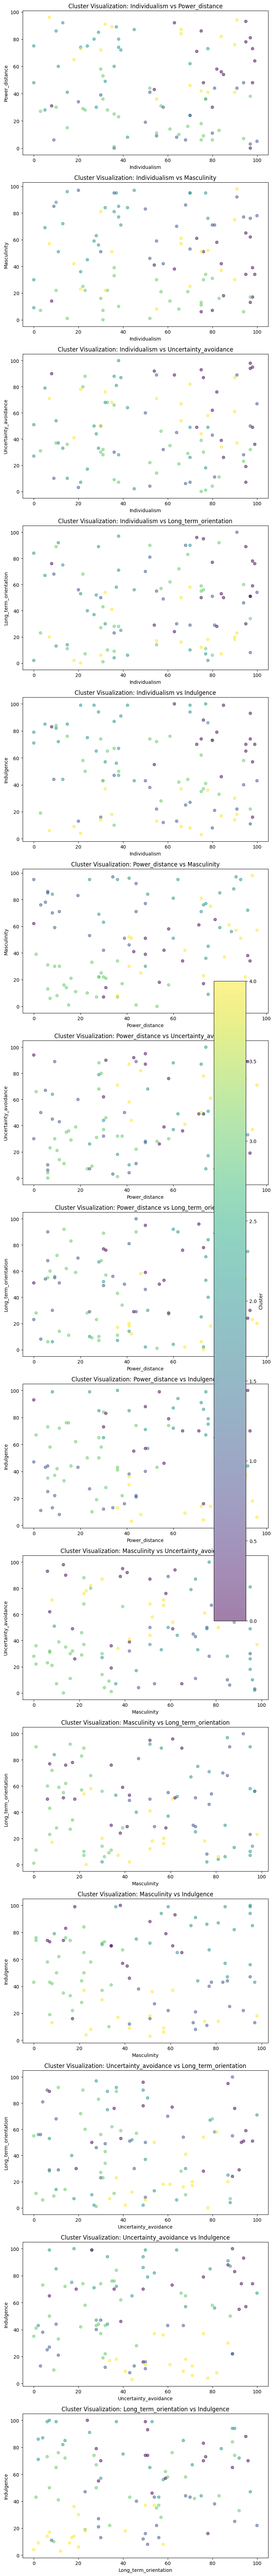

In [6]:
import itertools
# Visualization of Clusters
def visualize_all_hofstede_dimensions(data):
    if data is None or data.empty:
        print("No data to visualize.")
        return
    dimensions = ['individualism', 'power_distance', 'masculinity', 'uncertainty_avoidance', 'long_term_orientation', 'indulgence']
    dimension_pairs = list(itertools.combinations(dimensions, 2))
    n = len(dimension_pairs)
    fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, 5 * n))
    for i, (dim1, dim2) in enumerate(dimension_pairs):
        ax = axes[i] if n > 1 else axes
        sc = ax.scatter(data[dim1], data[dim2], c=data['cluster'], cmap='viridis', alpha=0.5)
        ax.set_xlabel(dim1.capitalize())
        ax.set_ylabel(dim2.capitalize())
        ax.set_title(f"Cluster Visualization: {dim1.capitalize()} vs {dim2.capitalize()}")
    fig.colorbar(sc, ax=axes.ravel().tolist(), orientation='vertical', label='Cluster')
    plt.tight_layout()
    plt.show()

visualize_all_hofstede_dimensions(analyzed_data)


Generate Enhanced Data for Simulation

In [7]:
def generate_enhanced_synthetic_data(num_scenarios):
    scenarios = []
    for _ in range(num_scenarios):
        conflict_level = np.random.normal(5, 2)
        strategy_effectiveness = np.random.normal(5, 2)
        relationship_level = np.random.normal(5, 2)
        cultural_difference = random.choice([0, 1])
        time_pressure = random.randint(1, 5)
        random_event = random.choice([0, 1])
        scenarios.append((conflict_level, strategy_effectiveness, relationship_level, cultural_difference, time_pressure, random_event))
    return scenarios

enhanced_synthetic_scenarios = generate_enhanced_synthetic_data(20)


Enhanced Simulation Function

In [8]:
def run_enhanced_simulation(scenarios):
    outcomes = []
    strategy_learning_factor = 0.1
    relationship_adjustment = 0.5
    for conflict, strategy, relationship, cultural_diff, time_press, event in scenarios:
        if cultural_diff:
            strategy -= 1
        if time_press > 3:
            conflict += 1
        adjusted_strategy = strategy + (relationship / 10)
        if event:
            conflict += random.randint(-2, 2)
        outcome = adjusted_strategy - conflict
        outcomes.append(outcome)
        strategy += strategy_learning_factor * outcome
        relationship += relationship_adjustment * outcome
    return outcomes

enhanced_simulation_outcomes = run_enhanced_simulation(enhanced_synthetic_scenarios)


Visualtion of Simulation Results

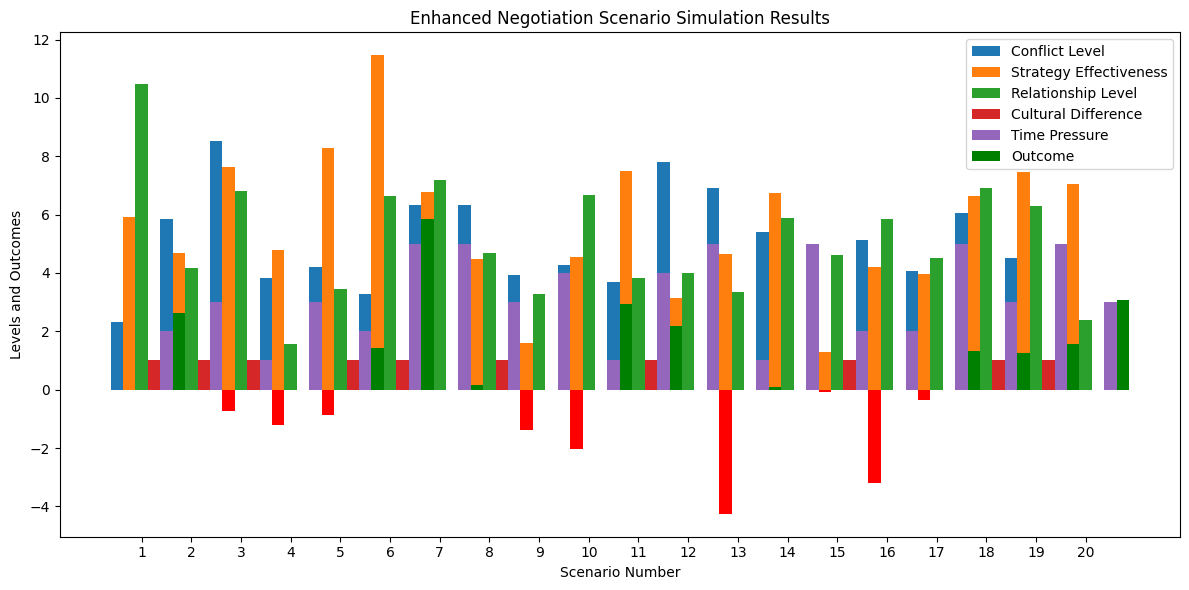

In [9]:
def visualize_enhanced_simulation_results(scenarios, outcomes):
    x = np.arange(len(scenarios))
    width = 0.25
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width * 2, [conflict for conflict, _, _, _, _, _ in scenarios], width, label='Conflict Level')
    ax.bar(x - width, [strategy for _, strategy, _, _, _, _ in scenarios], width, label='Strategy Effectiveness')
    ax.bar(x, [relationship for _, _, relationship, _, _, _ in scenarios], width, label='Relationship Level')
    ax.bar(x + width, [cultural for _, _, _, cultural, _, _ in scenarios], width, label='Cultural Difference')
    ax.bar(x + width * 2, [time for _, _, _, _, time, _ in scenarios], width, label='Time Pressure')
    outcome_colors = ['green' if outcome >= 0 else 'red' for outcome in outcomes]
    ax.bar(x + width * 3, outcomes, width, color=outcome_colors, label='Outcome')
    ax.set_xlabel('Scenario Number')
    ax.set_ylabel('Levels and Outcomes')
    ax.set_title('Enhanced Negotiation Scenario Simulation Results')
    ax.set_xticks(x)
    ax.set_xticklabels(range(1, len(scenarios) + 1))
    ax.legend()
    fig.tight_layout()
    plt.show()

visualize_enhanced_simulation_results(enhanced_synthetic_scenarios, enhanced_simulation_outcomes)


Heatmap visualization

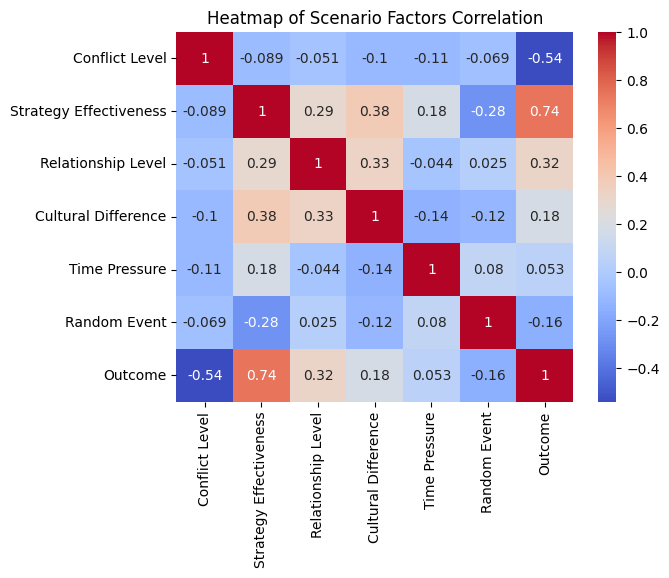

In [10]:
def visualize_with_heatmap(scenarios, outcomes):
    df = pd.DataFrame(scenarios, columns=['Conflict Level', 'Strategy Effectiveness', 'Relationship Level', 'Cultural Difference', 'Time Pressure', 'Random Event'])
    df['Outcome'] = outcomes
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Heatmap of Scenario Factors Correlation')
    plt.show()

visualize_with_heatmap(enhanced_synthetic_scenarios, enhanced_simulation_outcomes)


Parallel Coordinates Visualization

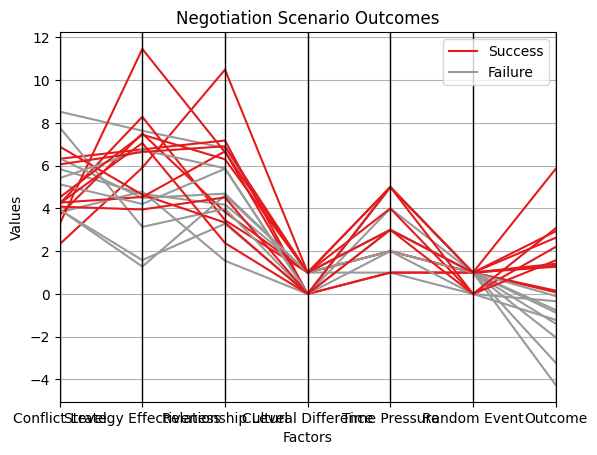

In [11]:
from pandas.plotting import parallel_coordinates

def visualize_with_parallel_coordinates(scenarios, outcomes):
    df = pd.DataFrame(scenarios, columns=['Conflict Level', 'Strategy Effectiveness', 'Relationship Level', 'Cultural Difference', 'Time Pressure', 'Random Event'])
    df['Outcome'] = outcomes
    df['Outcome Category'] = ['Success' if o >= 0 else 'Failure' for o in outcomes]

    parallel_coordinates(df, 'Outcome Category', colormap=plt.get_cmap("Set1"))
    plt.title('Negotiation Scenario Outcomes')
    plt.xlabel('Factors')
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()

visualize_with_parallel_coordinates(enhanced_synthetic_scenarios, enhanced_simulation_outcomes)


Interactive Dashboard Visualization

In [12]:
def visualize_with_interactive_dashboard(scenarios, outcomes):
    df = pd.DataFrame(scenarios, columns=['Conflict Level', 'Strategy Effectiveness', 'Relationship Level', 'Cultural Difference', 'Time Pressure', 'Random Event'])
    df['Outcome'] = outcomes

    fig = px.scatter(df, x='Strategy Effectiveness', y='Relationship Level', color='Outcome', size='Conflict Level', hover_data=df.columns)
    fig.update_layout(title='Interactive Visualization of Scenario Outcomes')
    fig.show()

visualize_with_interactive_dashboard(enhanced_synthetic_scenarios, enhanced_simulation_outcomes)


Setup for Agent Based Model

In [13]:
class Negotiator:
    def __init__(self, strategy_effectiveness, relationship_level, cultural_difference, time_pressure):
        self.strategy_effectiveness = strategy_effectiveness
        self.relationship_level = relationship_level
        self.cultural_difference = cultural_difference
        self.time_pressure = time_pressure
        self.conflict_level = np.random.normal(5, 2)

    def decide(self, event):
        if self.cultural_difference:
            self.strategy_effectiveness -= 1
        if self.time_pressure > 3:
            self.conflict_level += 1
        if event:
            self.conflict_level += random.randint(-2, 2)

        outcome = self.strategy_effectiveness + (self.relationship_level / 10) - self.conflict_level
        return outcome

def generate_agents(num_agents):
    agents = []
    for _ in range(num_agents):
        strategy_effectiveness = np.random.normal(5, 2)
        relationship_level = np.random.normal(5, 2)
        cultural_difference = random.choice([0, 1])
        time_pressure = random.randint(1, 5)
        agent = Negotiator(strategy_effectiveness, relationship_level, cultural_difference, time_pressure)
        agents.append(agent)
    return agents

def run_agent_simulation(agents):
    outcomes = []
    for agent in agents:
        random_event = random.choice([0, 1])
        outcome = agent.decide(random_event)
        outcomes.append(outcome)
    return outcomes

num_agents = 20
agents = generate_agents(num_agents)
simulation_outcomes = run_agent_simulation(agents)


Convert agent Data for Visualization

In [14]:
def convert_agent_data_for_visualization(agents, outcomes):
    data = {
        "Strategy Effectiveness": [agent.strategy_effectiveness for agent in agents],
        "Relationship Level": [agent.relationship_level for agent in agents],
        "Cultural Difference": [agent.cultural_difference for agent in agents],
        "Time Pressure": [agent.time_pressure for agent in agents],
        "Conflict Level": [agent.conflict_level for agent in agents],
        "Outcome": outcomes
    }
    df = pd.DataFrame(data)
    return df

agent_data_df = convert_agent_data_for_visualization(agents, simulation_outcomes)


Visualization Functions

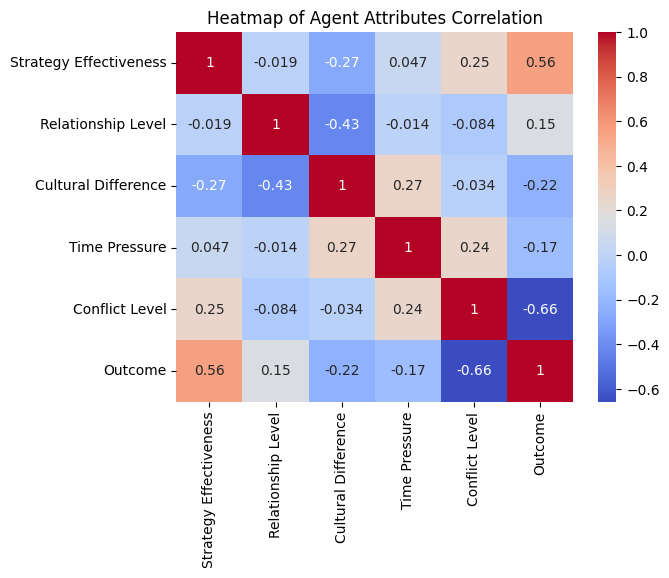

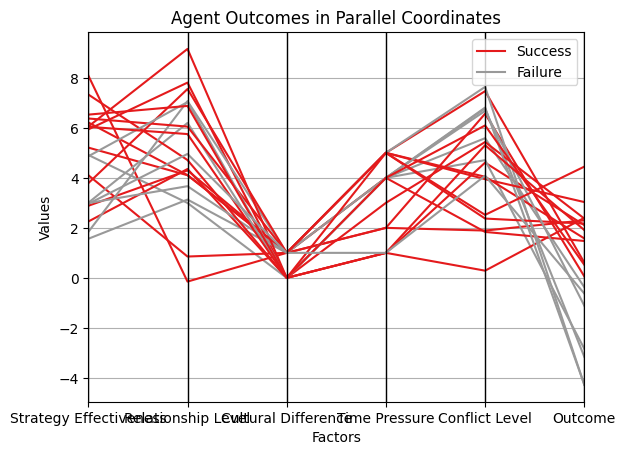

In [17]:
def visualize_with_heatmap(df):
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Heatmap of Agent Attributes Correlation')
    plt.show()

def visualize_with_parallel_coordinates(df):
    df['Outcome Category'] = ['Success' if o >= 0 else 'Failure' for o in df['Outcome']]
    parallel_coordinates(df, 'Outcome Category', colormap=plt.get_cmap("Set1"))
    plt.title('Agent Outcomes in Parallel Coordinates')
    plt.xlabel('Factors')
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()

# Visualize the agent data
visualize_with_heatmap(agent_data_df)
visualize_with_parallel_coordinates(agent_data_df)

# Note: The interactive dashboard visualization can be added here if desired.



Sentiment analysis placeholder

In [19]:
# Placeholder for sentiment analysis function
def analyze_sentiment(text):

    return random.choice(["Positive", "Neutral", "Negative"])

# Enhancing the Negotiator class to include sentiment analysis
class EnhancedNegotiator(Negotiator):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.sentiment = "Neutral"

    def decide(self, event, communication):
        self.sentiment = analyze_sentiment(communication)
        return super().decide(event)

# Implementing a function to generate enhanced agents with sentiment analysis capabilities
def generate_enhanced_agents(num_agents):
    enhanced_agents = []
    for _ in range(num_agents):
        agent = EnhancedNegotiator(np.random.normal(5, 2), np.random.normal(5, 2), random.choice([0, 1]), random.randint(1, 5))
        enhanced_agents.append(agent)
    return enhanced_agents

enhanced_agents = generate_enhanced_agents(num_agents)


Incorporating communication patterns

In [20]:
def run_enhanced_agent_simulation(agents):
    enhanced_outcomes = []
    for agent in agents:
        random_event = random.choice([0, 1])
        # Example communication, in practice, this would be more complex and varied
        communication = "Let's find a common ground."
        outcome = agent.decide(random_event, communication)
        enhanced_outcomes.append(outcome)
    return enhanced_outcomes

enhanced_simulation_outcomes = run_enhanced_agent_simulation(enhanced_agents)


Visualizing Enhanced SImulation Results

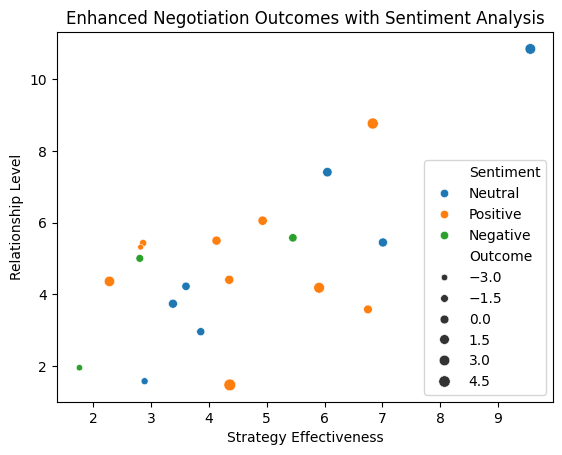

In [21]:
def visualize_enhanced_simulation_results(agents, outcomes):
    df = pd.DataFrame({
        "Strategy Effectiveness": [agent.strategy_effectiveness for agent in agents],
        "Relationship Level": [agent.relationship_level for agent in agents],
        "Sentiment": [agent.sentiment for agent in agents],
        "Outcome": outcomes
    })

    sns.scatterplot(data=df, x="Strategy Effectiveness", y="Relationship Level", hue="Sentiment", size="Outcome")
    plt.title("Enhanced Negotiation Outcomes with Sentiment Analysis")
    plt.xlabel("Strategy Effectiveness")
    plt.ylabel("Relationship Level")
    plt.show()

visualize_enhanced_simulation_results(enhanced_agents, enhanced_simulation_outcomes)
